In [8]:
import numpy as np 
import pandas as pd
import os 


In [9]:
def fetch_data(filepath, filename):
    path = os.path.join(filepath, filename)
    return pd.read_csv(path)
data = fetch_data('C:/Users/ibrah/Downloads','Fraud.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
# will help in column transformation and data processing later
data['nameDest'].str.startswith('M').sum()

2151495

In [13]:
data[['first_nameDest', 'second_nameDest']] = data['nameDest'].str.extract(r'([A-Za-z])(\d+)')
data['second_nameDest'] = data['second_nameDest'].astype(int)

data[['first_nameOrig', 'second_nameOrig']] = data['nameOrig'].str.extract(r'([A-Za-z])(\d+)')
data['second_nameOrig'] = data['second_nameOrig'].astype(int)


In [14]:
data.drop(columns=['first_nameOrig'], axis=1)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,first_nameDest,second_nameDest,second_nameOrig
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,M,1979787155,1231006815
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,M,2044282225,1666544295
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,C,553264065,1305486145
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,C,38997010,840083671
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,M,1230701703,2048537720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,C,776919290,786484425
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,C,1881841831,1529008245
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,C,1365125890,1162922333
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,C,2080388513,1685995037


In [15]:
# no column contains nan value and this decrease our effort for data cleaning
for column in data.columns:
    count_nan = data[column].isna().sum()
    print(count_nan)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


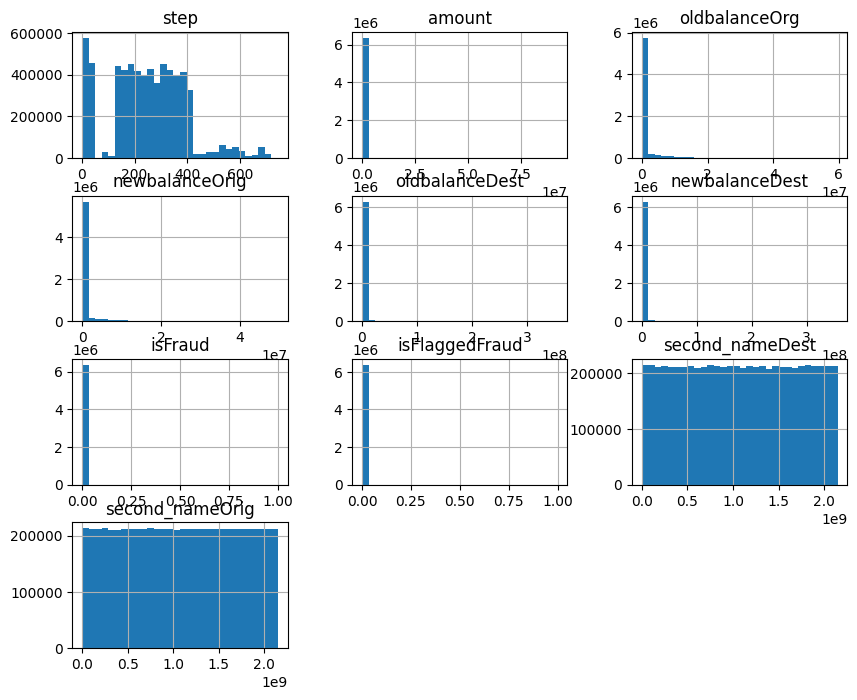

In [16]:
# histogram to make visual impression on the data
import matplotlib.pyplot as plt
data.select_dtypes(include=['number']).hist(bins=30, figsize=(10,8))
plt.show()

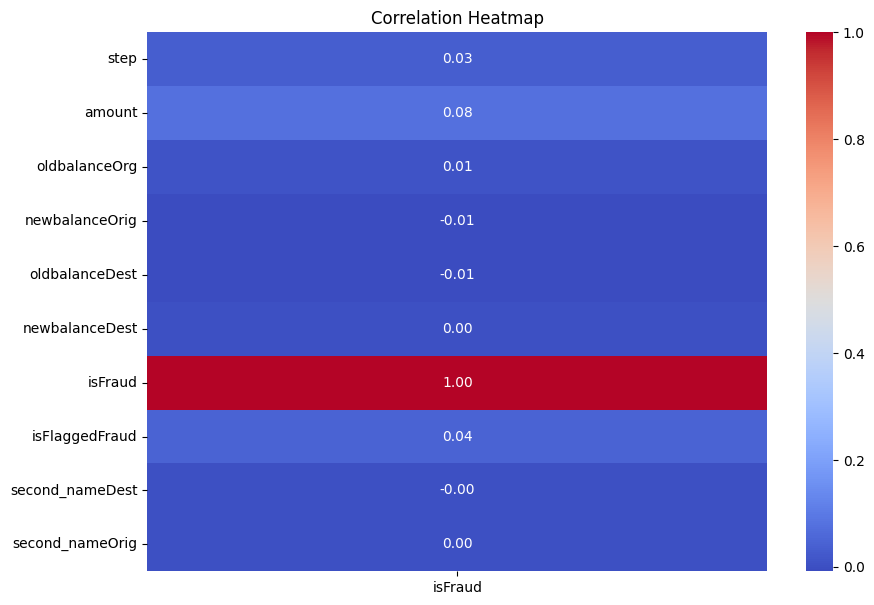

In [70]:
import numpy as np
import seaborn as sns
plt.figure(figsize=(10,7))
num = data.select_dtypes(include='number')
corr_matrix = num.corr()[['isFraud']]
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f" )
plt.title("Correlation Heatmap")
plt.show()


In [17]:
# spliiting the data into train and test then specifing smaller part for validations
from sklearn.model_selection import StratifiedShuffleSplit
data['stratify_column'] = data['isFraud'].astype(str)+'_'+data['isFlaggedFraud'].astype(str)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.15)
for train_index, test_index in split.split(data, data['stratify_column']):
    train_full = data.loc[train_index].reset_index(drop=True)
    test_ = data.loc[test_index]

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1)
for train_index, valid_index in split.split(train_full, train_full['stratify_column']):
    train = train_full.loc[train_index]
    valid = train_full.loc[valid_index]

In [19]:
for set_ in (train, valid, test_):
    set_.drop(columns=['stratify_column'], axis=1, inplace=True)


In [20]:
for set_ in (train, valid, test_):
    set_.drop(columns=['nameOrig','nameDest','first_nameOrig'], axis=1, inplace=True)


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4867404 entries, 4587740 to 3210019
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   type             object 
 2   amount           float64
 3   oldbalanceOrg    float64
 4   newbalanceOrig   float64
 5   oldbalanceDest   float64
 6   newbalanceDest   float64
 7   isFraud          int64  
 8   isFlaggedFraud   int64  
 9   first_nameDest   object 
 10  second_nameDest  int32  
 11  second_nameOrig  int32  
dtypes: float64(5), int32(2), int64(3), object(2)
memory usage: 445.6+ MB


In [22]:
y_train = train[['isFraud','isFlaggedFraud']]
x_train = train.drop(columns=['isFraud','isFlaggedFraud'])

y_valid = valid[['isFraud','isFlaggedFraud']]
x_valid = valid.drop(columns=['isFraud','isFlaggedFraud'])

y_test = test_[['isFraud','isFlaggedFraud']]
x_test = test_.drop(columns=['isFraud','isFlaggedFraud'])

In [51]:
object_columns = x_train.select_dtypes(include=['object']).columns
non_object_columns = x_train.select_dtypes(exclude=['object']).columns
x_train = pd.concat([x_train[non_object_columns], x_train[object_columns]], axis=1)

object_columns = x_valid.select_dtypes(include=['object']).columns
non_object_columns = x_valid.select_dtypes(exclude=['object']).columns
x_valid = pd.concat([x_valid[non_object_columns], x_valid[object_columns]], axis=1)

object_columns = x_test.select_dtypes(include=['object']).columns
non_object_columns = x_test.select_dtypes(exclude=['object']).columns
x_test = pd.concat([x_test[non_object_columns], x_test[object_columns]], axis=1)





In [41]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4867404 entries, 4587740 to 3210019
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   amount           float64
 2   oldbalanceOrg    float64
 3   newbalanceOrig   float64
 4   oldbalanceDest   float64
 5   newbalanceDest   float64
 6   second_nameDest  int32  
 7   second_nameOrig  int32  
 8   type             object 
 9   first_nameDest   object 
dtypes: float64(5), int32(2), int64(1), object(2)
memory usage: 500.4+ MB


In [52]:
def save_to_multiple_files(df, prefix, folder="fraud_chunks", n_parts=20):
    os.makedirs(folder, exist_ok=True)
    filepaths = []
    for idx, indices in enumerate(np.array_split(df.index, n_parts)):
        path = os.path.join(folder, f"{prefix}_{idx:02}.csv")
        df.loc[indices].to_csv(path, index=False)
        filepaths.append(path)
    return filepaths

# Save all 6 datasets
x_train_paths = save_to_multiple_files(x_train, "x_train", n_parts=20)
y_train_paths = save_to_multiple_files(y_train, "y_train", n_parts=20)
x_valid_paths = save_to_multiple_files(x_valid, "x_valid", n_parts=10)
y_valid_paths = save_to_multiple_files(y_valid, "y_valid", n_parts=10)
x_test_paths = save_to_multiple_files(x_test, "x_test", n_parts=10)
y_test_paths = save_to_multiple_files(y_test, "y_test", n_parts=10)


In [53]:
import tensorflow as tf
numerical_train = x_train.select_dtypes(include=['number']).columns
categorical_train = x_train.select_dtypes(include=['object']).columns
def preprocess_tf_dataset(filepaths_x, filepaths_y, batch_size=256):
    
    x_ds = tf.data.Dataset.list_files(filepaths_x, shuffle=True).interleave(
        lambda f: tf.data.TextLineDataset(f).skip(1),
        cycle_length=5, num_parallel_calls=tf.data.AUTOTUNE)
    
    y_ds = tf.data.Dataset.list_files(filepaths_y, shuffle=True).interleave(
        lambda f: tf.data.TextLineDataset(f).skip(1),
        cycle_length=5, num_parallel_calls=tf.data.AUTOTUNE)
    
    def parse_x(line):
    
        record_defaults = [0.0] * (len(numerical_train)) + [''] * (len(categorical_train))  # Numeric columns are float, categorical are strings
        fields = tf.io.decode_csv(line, record_defaults=record_defaults)
        
        # Separate numeric and categorical fields if needed
        numeric_fields = fields[:len(numerical_train)]
        categorical_fields = fields[len(numerical_train):]
    
    # Convert categorical fields to a tensor and keep numeric fields as is
        return tf.stack(numeric_fields), categorical_fields


    def parse_y(line):
        fields = tf.io.decode_csv(line, record_defaults=[0.0]*2)
        return tf.stack(fields)

    x_ds = x_ds.map(parse_x, num_parallel_calls=tf.data.AUTOTUNE)
    y_ds = y_ds.map(parse_y, num_parallel_calls=tf.data.AUTOTUNE)
    
    ds = tf.data.Dataset.zip((x_ds, y_ds)).batch(batch_size).prefetch(1)
    return ds

train_ds = preprocess_tf_dataset(x_train_paths, y_train_paths, batch_size=256)
valid_ds = preprocess_tf_dataset(x_valid_paths, y_valid_paths, batch_size=256)
test_ds = preprocess_tf_dataset(x_test_paths, y_test_paths, batch_size=256)



In [ ]:
import numpy as np

def dataset_to_numpy(dataset, limit_batches=100):
    x_cat_list, x_num_list, y_list = [], [], []
    
    for i, (x, y) in enumerate(dataset):
        print("Batch ", i)
        print("x:", x)  
        print("y:", y)  
        
       
        if isinstance(x, tuple):  
            x_cat, x_num = x  # Assuming the tuple contains categorical and numerical arrays
        else:
            x_cat = x[:, :-2]  
            x_num = x[:, -2:]  
        
        x_cat_list.append(x_cat.numpy())
        x_num_list.append(x_num.numpy())
        y_list.append(y.numpy())
        
        if i >= limit_batches:
            break
    
    return np.vstack(x_cat_list), np.vstack(x_num_list), np.vstack(y_list)

# Convert TensorFlow datasets to numpy arrays
x_train_cat, x_train_num, y_train_np = dataset_to_numpy(train_ds, limit_batches=100)
x_valid_cat, x_valid_num, y_valid_np = dataset_to_numpy(valid_ds, limit_batches=50)
x_test_cat, x_test_num, y_test_np = dataset_to_numpy(test_ds, limit_batches=50)

# Combine categorical and numerical features
x_train = np.hstack((x_train_cat, x_train_num))
x_valid = np.hstack((x_valid_cat, x_valid_num))
x_test = np.hstack((x_test_cat, x_test_num))


Batch  0
x: (<tf.Tensor: shape=(256, 8), dtype=float32, numpy=
array([[2.6100000e+02, 1.2061670e+04, 3.0925000e+04, ..., 0.0000000e+00,
        1.4104248e+09, 6.9348339e+08],
       [2.1200000e+02, 5.0410081e+05, 1.0217000e+04, ..., 3.5429058e+06,
        4.9817731e+08, 1.2105274e+07],
       [2.7900000e+02, 7.4880400e+03, 4.5703070e+04, ..., 0.0000000e+00,
        2.2813925e+08, 1.2948052e+09],
       ...,
       [3.0400000e+02, 1.3246227e+05, 1.5773592e+07, ..., 1.0911649e+06,
        1.0693190e+09, 1.2680503e+09],
       [3.0400000e+02, 2.1733699e+04, 0.0000000e+00, ..., 0.0000000e+00,
        8.3068358e+08, 2.7179610e+08],
       [2.0900000e+02, 1.3829083e+05, 0.0000000e+00, ..., 3.9976418e+06,
        3.5744230e+06, 1.0297049e+09]], dtype=float32)>, <tf.Tensor: shape=(256, 2), dtype=string, numpy=
array([[b'PAYMENT', b'M'],
       [b'TRANSFER', b'C'],
       [b'PAYMENT', b'M'],
       [b'TRANSFER', b'C'],
       [b'PAYMENT', b'M'],
       [b'CASH_OUT', b'C'],
       [b'CASH_OUT', 

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
categorical_train = np.arange(x_train.shape[1] - 2, x_train.shape[1])  # Last two columns are categorical
numerical_train = np.arange(x_train.shape[1] - 2) 
numeric_pipeline = Pipeline([
    ('std', StandardScaler()),
])
categorical_pipeline = Pipeline([
    ('one_hot', OneHotEncoder())
])
full_pipeline = ColumnTransformer([
    ('num', numeric_pipeline, numerical_train),
    ('cat', categorical_pipeline, categorical_train)
])
preprocessed_train = full_pipeline.fit_transform(x_train)
preprocessed_train.shape

(25856, 15)

In [59]:
preprocessed_test = full_pipeline.fit_transform(x_test)
preprocessed_valid = full_pipeline.fit_transform(x_valid)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


numeric_pipeline = Pipeline([
    ('std', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('one_hot', OneHotEncoder())  
])

full_preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_train),
    ('cat', categorical_pipeline, categorical_train)
])

pipeline = Pipeline([
    ('preprocessor', full_preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_distribs = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distribs, 
    n_iter=15, 
    cv=3, 
    scoring='accuracy',
    verbose=2
)

random_search.fit(x_train, y_train_np)
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   4.5s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   4.5s
[CV] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   4.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  12.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  13.1s
[CV] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=300; total time=  13.7s
[CV] END classifier__max_depth=None, cl

In [ ]:
from sklearn.metrics import accuracy_score

best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test_np, y_pred)
print("Test Set Accuracy:", accuracy)


Test Set Accuracy: 0.9983915441176471


finally 99.8% accuracy 

Q2 : slicing and chuncking our big file to smaller files as it was to big to allocate all at once to random forest classifier

Q3 : first by making new columns from name columns and then by fine tuning the huperparameters of random forest using randomized search

Q4 : fine tuning get us the best score of 99.8 percent on test set and this indicates that it did not overfit the data

Q5 and Q6 : from the correlation matrix we have done by matplotlib and seaborn the amount column has the highest correlation and this makes sense as mostly the fraud transaction would be of great amount to steal all the money he can get

Q7 : making harsh testing and authentication for large transactions and this can be tested easily  